In [32]:
import pandas as pd
import ast
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime
from datasets import load_dataset

dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda date: ast.literal_eval(date) if pd.notna(date) else date)

In [33]:
df_us_da = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()
df_us_da = df_us_da.dropna(subset=['salary_year_avg'])
df_us_da = df_us_da.explode('job_skills')
df_us_da_group = df_us_da.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

In [34]:
df_da_top_pay = df_us_da_group.sort_values(by='median', ascending=False).head(10)
df_da_skills = df_us_da_group.sort_values(by='count', ascending=False).head(10).sort_values(by='median', ascending=False)

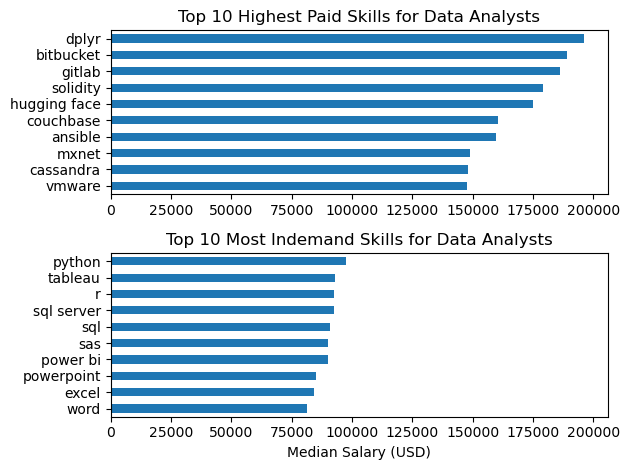

In [31]:
fig, ax = plt.subplots(2, 1)

df_da_top_pay[::-1].plot(kind='barh', y='median', ax=ax[0], legend=False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analysts')
ax[0].set_ylabel('')
ax[0].set_xlabel('')

df_da_skills[::-1].plot(kind='barh', y='median', ax=ax[1], legend=False)
ax[1].set_title('Top 10 Most Indemand Skills for Data Analysts')
ax[1].set_xlabel('Median Salary (USD)')
ax[1].set_ylabel('')
ax[1].set_xlim(ax[0].set_xlim())

fig.tight_layout()
plt.show()